# 作業 : (Kaggle)鐵達尼生存預測
## [教學目標]
以下用鐵達尼預測資料, 展示如何使用葉編碼, 並觀察預測效果 <br />
因為只有分類問題比較適合葉編碼, 因此範例與作業都使用鐵達尼的資料(二元分類問題) <br />
## [教學目標] 
了解葉編碼的寫作方式 : 使用梯度提升樹 <br />
觀察葉編碼搭配邏輯斯迴歸後的效果 <br />

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

data_dir = './data/'
train_df = pd.read_csv(data_dir + 'titanic_train.csv')
train_label = train_df.Survived

train_df = train_df.drop(['PassengerId','Survived'], axis = 1)
train_df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
for col in train_df.columns:
    train_df[col] = train_df[col].fillna(-1)
    if train_df[col].dtype == 'object':
        train_df[col] = LabelEncoder().fit_transform(list(train_df[col].values))
    train_df[col] = MinMaxScaler().fit_transform(train_df[col].values.reshape(-1,1))

train_df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [5]:
train_x, test_x, train_y, test_y = train_test_split(train_df,train_label,test_size = 0.5)
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 0.5)

GBC = GradientBoostingClassifier(subsample=0.93, n_estimators=320, min_samples_split=0.1, min_samples_leaf=0.3, 
                                  max_features=4, max_depth=4, learning_rate=0.16)
LR = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

GBC.fit(train_x,train_y)
onehot = OneHotEncoder()
onehot.fit(GBC.apply(train_x)[:,:,0])
LR.fit(onehot.transform(GBC.apply(val_x)[:,:,0]), val_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
print(train_x.shape)
print(GBC.apply(train_x)[:,:,0].shape)
print(GBC.apply(train_x)[:,:,0])

(222, 10)
(222, 320)
[[2. 2. 1. ... 2. 4. 1.]
 [1. 2. 1. ... 2. 3. 2.]
 [1. 2. 1. ... 2. 3. 2.]
 ...
 [2. 1. 2. ... 1. 4. 2.]
 [1. 2. 1. ... 2. 2. 1.]
 [1. 1. 2. ... 1. 3. 1.]]


In [7]:
pred_gbc_lr = LR.predict_proba(onehot.transform(GBC.apply(test_x)[:,:,0]))[:,1]
fpr_gbc_lr, tpr_gbc_lr, _ = roc_curve(test_y,pred_gbc_lr)

pred_gbc = GBC.predict_proba(test_x)[:,1]
fpr_gbc, tpr_gbc, _ = roc_curve(test_y,pred_gbc)

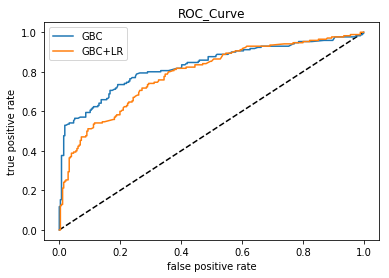

In [8]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_gbc,tpr_gbc,label = 'GBC')
plt.plot(fpr_gbc_lr,tpr_gbc_lr,label = 'GBC+LR')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate' )
plt.title('ROC_Curve')
plt.legend(loc = 'best')
plt.show()

# 作業 : (Kaggle)鐵達尼生存預測
## [作業目標]
試著模仿範例寫法, 在鐵達尼生存預測中, 使用葉編碼並觀察預測效果 <br />
## [作業重點]
仿造範例, 完成葉編碼的寫作 : 使用隨機森林 <br />
仿造範例, 觀察葉編碼搭配邏輯斯迴歸後的效果 

In [9]:
from sklearn.ensemble import RandomForestClassifier
data_dir = './data/'
df = pd.read_csv(data_dir + 'titanic_train.csv')

train_label = df.Survived
df = df.drop(['PassengerId','Survived'], axis = 1)
df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
for col in df.columns:
    df[col] = df[col].fillna(-1)
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(list(df[col].values))
    df[col] = MinMaxScaler().fit_transform(df[col].values.reshape(-1,1))

df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


## 作業1
請對照範例，完成隨機森林的鐵達尼生存率預測，以及對應的葉編碼+邏輯斯迴歸

In [12]:
train_x,test_x,train_y,test_y = train_test_split(df,train_label,test_size = 0.5)
train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,test_size = 0.5)

RFC = RandomForestClassifier(n_estimators = 20, min_samples_split = 10, min_samples_leaf = 5,
                             max_features = 4, max_depth = 3, bootstrap = True)
LR = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [13]:
RFC.fit(train_x,train_y)
onehot = OneHotEncoder()
onehot.fit(RFC.apply(train_x))
LR.fit(onehot.transform(RFC.apply(val_x)), val_y)

pred_rfc_lr = LR.predict_proba(onehot.transform(RFC.apply(test_x)))[:,1]
pred_rfc = RFC.predict_proba(test_x)[:,1]

fpr_rfc_lr, tpr_rfc_lr, _ = roc_curve(test_y,pred_rfc_lr)
fpr_rfc, tpr_rfc, _ = roc_curve(test_y,pred_rfc)

# 作業2
上述的結果，葉編碼是否有提高預測的正確性呢?

[]

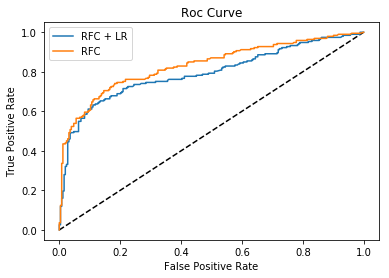

In [14]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rfc_lr, tpr_rfc_lr, label = 'RFC + LR')
plt.plot(fpr_rfc , tpr_rfc, label = 'RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc = 'best')
plt.plot()